<a href="https://colab.research.google.com/github/onolab-tmu/audio-processing-100-knocks/blob/master/lesson6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 6: スコープ、クラスとオブジェクト指向

## スコープ

プログラムの中の変数の有効範囲は、スコープと読んでます。

パイソンでは、スコープは二つあります：
* **ローカルスコープ** 関数の中
* **グローバルスコープ** プログラム全体

### 最初はローカルスコープの例

In [0]:
def my_func():
  # `a` is a local variable of function `my_func`
  a = 10
  print("a value is", a)

`my_func`を呼ぶと、想像通りに行きます。

In [0]:
my_func()

a value is 10


けれども、`my_func`の外から、`a`にアクセスしようとするとエラー発生です。

In [0]:
print(a)

NameError: ignored

### グローバルスコープのれい

In [0]:
b = 7

def my_func2():
  print("b value is", b)

`my_func2`を走らせると、また思う通りに行きます。

In [0]:
my_func2()

b value is 7


そして、今回は

In [0]:
print(b)

7


エラー発生しません。

という事で、
* ローカルスコープの変数はグローバルスコーデアクセス**出来ません**.
* グローバルスコープの変数はローカルスコープでアクセス**出来ます**.

なう、グローバルで`b`を編集するとどうなるのでしょうか？




In [0]:
b = 36
my_func2()

b value is 36


`my_func2`の中は本当にグローバルスコープの`b`を使ってるので、`b`を編集すると、関数の結果も変わります！

### 変数名が被った時

In [0]:
c = 21

def my_func3():
  c = "a string"
  print("c value is", c)

In [0]:
my_func3()

c value is a string


In [0]:
print(c)

21


グローバルも、ローカルスコープも、どちらも同じ変数名が存在しますと、
1. ローカルスコープで作成した変数は**別の変数**になっています。例のコードで、関数の中`c = "a string"`を書いた時、グローバルスコープの`c`の中身は変わっていませんでした。
2. ローカルスコープの変数があると、グローバルスコープの同じ名前の変数は**アクセス出来なくなります**。(shadowing)

もうし、関数の中にグローバルスコープの変数を変えたい場合は、`global`キーワードを使えます。

In [0]:
d = 73

def my_func4():
  global d
  print("my_func4: d value was", d)
  d = "I am a string now"
  print("my_func4: d value is", d)

In [0]:
my_func4()

my_func4: d value was 73
my_func4: d value is I am a string now


In [0]:
print(d)

I am a string now


## クラスとオブジェクト指向

オブジェクト指向は複雑データタイプと、このタイプに対するオペレーションのプログラムの書き方です。

例えば、簡単な物理シミュレーションを考えましょう。ボールがあって、投げた時、ニュートン力学に関して、どこまで行くか、プログラムで書きたい。

ボールの必要なプロパーティは
* 半径
* 位置

投げた時は速度のベクトルと飛ぶ時間で、新しい位置を計算するのが目的です。

とりあえず、オブジェクトを使わず書いて見ましょう。


In [0]:
import math

my_ball_position = 10.
my_ball_radius = 0.5
a_earth = 9.81

def compute_fall_time(position, radius, acceleration):
  """
  compute the ball new location after fly time, when thrown at speed
  """
  

  fall_time = math.sqrt(2 * (position - radius) / acceleration)

  return fall_time

t_fall = compute_fall_time(my_ball_position, my_ball_radius, a_earth)
print(f"The ball falls for {t_fall} seconds")

The ball falls for 1.3916893275819882 seconds


こう書くと、色々不便なところはあります。
* 位置と半径は別の変数が入ります。
* ボールがいっぱいあると、ちょっと変数の扱いが大変になります。
* `compute_fall_time`関数は`position`と`radius`と対応してます。
* `a_earth`はどう扱えばいいのか？

オブジェクト指向使えば、もっとまとまった書き方があります。
その時、新しいタイプを作成します。


In [0]:
class Ball:

  def __init__(self, pos, rad, accel):
    self.position = pos
    self.radius = rad
    self.acceleration = accel

  def __repr__(self):
    return f"This is a ball with position {self.position}, radius {self.radius}, and acceleration {self.acceleration}"

  def fall_time(self):
    a_earth = 9.81
    fall_time = math.sqrt(2 * (self.position - self.radius) / self.acceleration)
    return fall_time

class EarthBall(Ball):

  def __init__(self, pos, rad):
    super().__init__(pos, rad, 9.81)

  def __repr__(self):
    return f"This is an Earth ball with position {self.position}, radius {self.radius}"

class MoonBall(Ball):

  def __init__(self, pos, rad):
    super().__init__(pos, rad, 1.635)

  def __repr__(self):
    return f"This is a Moon ball with position {self.position}, radius {self.radius}"

my_ball = Ball(10, 0.5, 9.81)
print("This is the ball radius:", my_ball.radius)
print("This is the ball position:", my_ball.position)

my_earth_ball = EarthBall(27, 1.2)
my_moon_ball = MoonBall(27, 1.2)

t_fall = my_ball.fall_time()
print(f"The ball falls for {t_fall} seconds")
print(f"The ball falls on Earth for {my_earth_ball.fall_time()} seconds")
print(f"The ball falls on Moon for {my_moon_ball.fall_time()} seconds")

This is the ball radius: 0.5
This is the ball position: 10
The ball falls for 1.3916893275819882 seconds
The ball falls on Earth for 2.293455654230203 seconds
The ball falls on Moon for 5.6177961005649655 seconds


In [0]:
print(my_moon_ball)
print(my_ball)

This is a Moon ball with position 27, radius 1.2
This is a ball with position 10, radius 0.5, and acceleration 9.81


In [0]:
class Ball2:

  def __init__(self, radius, position=0, speed=0, acceleration=9.81):
    self.position = position
    self.speed = speed
    self.radius = radius
    self.acceleration = acceleration

  def fall_time(self, x):
    discriminant = self.speed ** 2 - 4 * (0.5 * self.acceleration) * (self.positioin - x)

    if discriminant < 0:
      return math.isinf
    elif discriminant == 0:
      return -self.speed / self.acceleration
    else:
      sol1 = (math.sqrt(discriminant) - self.speed) / self.acceleration
      sol2 = (math.sqrt(discriminant) + self.speed) / self.acceleration

      return min(sol1, sol2)

  def fly(self, t):

    # update position and speed
    self.position += self.speed * t + 0.5 * self.acceleration * t ** 2
    self.speed += self.acceleration * t
    

In [0]:
import numpy as np

time = []
position = []

my_ball = Ball2(0.5, position=0, speed=-30, acceleration=9.81)

step = 0.1

for t in np.arange(0, 10, step):

  position.append(-my_ball.position)
  time.append(t)

  my_ball.fly(step)

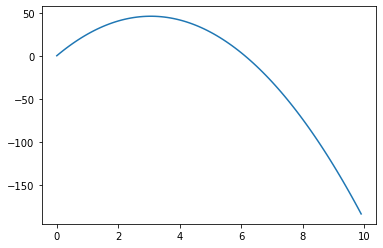

In [0]:
import matplotlib.pyplot as plt

plt.plot(time, position)